# ML Logistic Regression
# Assignment 4
# Sanjeev Pandey
# MT23AAI001

In [1]:
# Suppress Warning message
import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [2]:
!pip install scorecardpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 199.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.7-py3-none-any.whl size=60629 sha256=6bebdf806d28ba75a5d5200b880e5a029754eded9909846f0aa3b9e73e991324
  Stored in directory: /root/.cache/pip/wheels/49/49/e9/7b845548eed3624ce37effdd13e9cb95a99272d692eb9e9e23
Successfully built scorecardpy


In [3]:
# Importing relevant libraries
import scorecardpy as sc
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
import matplotlib
print(matplotlib.__version__)

3.8.0


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Reading the dataset
# default delimeter is comma (,) however file is having semicolon(;) as delimeter so its required to specify
df_bank = pd.read_csv('/content/drive/MyDrive/Intellipaat-sem2/AirPollutionAnalysis/VNIT-AAI-SEM2/SEM-2/ML-ALGO/WorkSpace/mlops/bank-full.csv',sep=';')

In [7]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
#number of rows x number of colmns
df_bank.shape

(45211, 17)

In [9]:
# listing all column heads

print(list(df_bank.columns))

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [10]:
df_bank['y'].value_counts()

,count
y,
no,39922
yes,5289


In [11]:
# Check the event rate: It shows what percentage of target variable is "yes" and what percentage is "no"
100* df_bank['y'].value_counts()/len(df_bank)

,count
y,
no,88.30152
yes,11.69848


In [12]:
# Remove data rows with any missing information for now. Can be used for partial cleaning
df_bank = df_bank.dropna()

In [13]:
print(list(df_bank.columns))

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [14]:
print(df_bank.shape)   # no change in values of execution 10 i.e. (45211, 17) that means no row is deleted by dropna

(45211, 17)


# Basic Data Exploration

In [15]:
# Get summary stats for the categorical features
df_bank.describe(include = ['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [16]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [17]:
# Create the feature/flag for Dependent variable - Attrition status
# this step is converting categorical values into numerical values.
# Here we are trabsforming Y column into binary flags
print(df_bank)
df_bank.y = df_bank.y.apply(lambda x: 1 if x =="yes" else 0)

print(df_bank)   # 'yes' / 'no' is converted to 1 and 0

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [18]:
# Check the event rate again after converting to numerical value
df_bank['y'].value_counts()/len(df_bank)

100* df_bank['y'].value_counts()/len(df_bank)

,count
y,
0,88.30152
1,11.69848


In [20]:
# Explore different features for any kind of inconsistent values
# it helpd find errorous values by visual check in the columns being checked
print('age:',sorted(df_bank.age.unique()))
print('job:',df_bank.job.unique())
print('marital:',df_bank.marital.unique())
print('education:',df_bank.education.unique())
print('default:',df_bank.default.unique())
print('housing:',df_bank.housing.unique())
print('loan:',df_bank.loan.unique())
print('contact:',df_bank.contact.unique())
print('day:',df_bank.day.unique())
print('month:',df_bank.month.unique())
print('duration:',df_bank.duration.unique())
print('campaign:',df_bank.campaign.unique())
print('poutcome:',df_bank.poutcome.unique())

age: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95]
job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
day: [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration: [ 261  151   76 ... 1298 1246 1556]
campaign: [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 

In [21]:
# A quick check - across job categories, distribution of average values
num_cols = ['age','balance','day','duration','campaign','pdays','previous']
df_bank.groupby('job')[num_cols].mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.289886,1135.838909,15.564301,246.896732,2.575324,47.859021,0.671630
blue-collar,40.044081,1078.826654,15.442561,262.901562,2.816995,44.033498,0.505138
entrepreneur,42.190989,1521.470074,15.702085,256.309348,2.799597,32.486214,0.478144
housemaid,46.415323,1392.395161,16.002419,245.825000,2.820968,21.505645,0.371774
management,40.449567,1763.616832,16.114189,253.995771,2.864348,38.665468,0.668006
retired,61.626767,1984.215106,15.439488,287.361307,2.346731,37.443905,0.638693
self-employed,40.484484,1647.970868,16.027866,268.157061,2.853072,34.747308,0.551615
services,38.740250,997.088108,15.635532,259.318729,2.718344,41.995185,0.501204
student,26.542644,1388.060768,14.897655,246.656716,2.299574,57.041578,0.953092


In [22]:
num_cols = ['age','balance','day','duration','campaign','pdays','previous']
df_bank.groupby('education')[num_cols].mean()

,age,balance,day,duration,campaign,pdays,previous
education,,,,,,,
primary,45.865567,1250.949934,15.421398,255.933002,2.834331,36.081740,0.489272
secondary,39.964270,1154.880786,15.759159,258.685760,2.700802,42.353504,0.567753
tertiary,39.593640,1758.416435,16.086535,258.518532,2.825577,39.024134,0.661980
unknown,44.510501,1526.754443,15.810985,257.313947,2.849219,36.856220,0.488422


In [23]:
num_cols = ['age','balance','day','duration','campaign','pdays','previous']
df_bank.groupby('default')[num_cols].mean()

,age,balance,day,duration,campaign,pdays,previous
default,,,,,,,
no,40.961934,1389.806424,15.795792,258.512749,2.756780,40.604536,0.586044
yes,39.534969,-137.624540,16.385276,239.115337,3.148466,18.042945,0.268712


Text(0, 0.5, 'Purchase Freq')

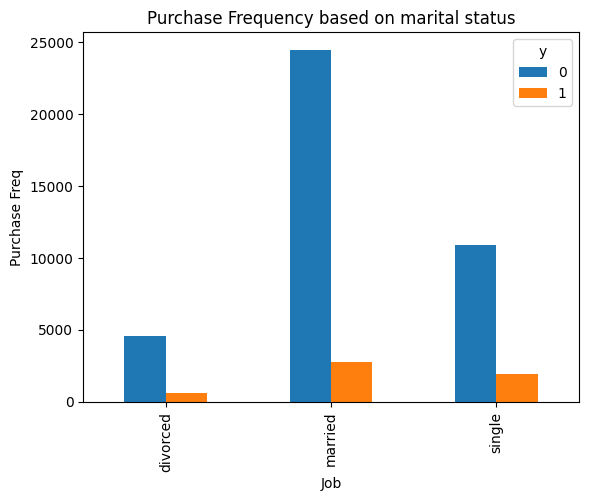

In [24]:
%matplotlib inline
pd.crosstab(df_bank.marital,df_bank.y).plot(kind='bar')
plt.title('Purchase Frequency based on marital status')
plt.xlabel('Job')
plt.ylabel('Purchase Freq')

Text(0, 0.5, 'Freq')

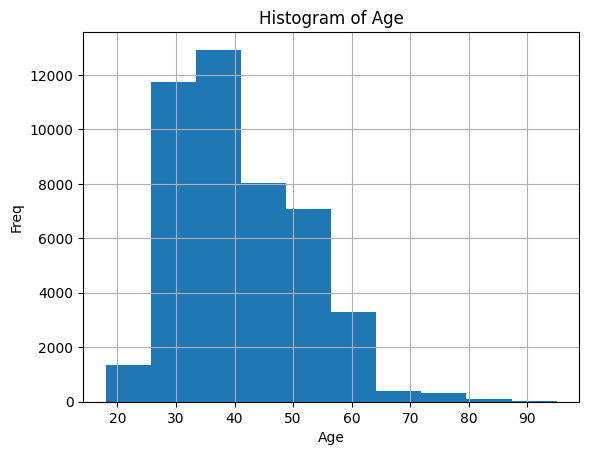

In [25]:
df_bank.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Freq')

In [26]:
# Convert the categorical features
# Creating dummies for all these variables
d_job = pd.get_dummies(df_bank['job'], prefix='job').astype(int)
d_education = pd.get_dummies(df_bank['education'], prefix='edu').astype(int)
d_default = pd.get_dummies(df_bank['default'], prefix='def').astype(int)
d_housing = pd.get_dummies(df_bank['housing'], prefix='housing').astype(int)
d_loan = pd.get_dummies(df_bank['loan'], prefix='loan').astype(int)
d_contact = pd.get_dummies(df_bank['contact'], prefix='con').astype(int)
d_poutcome = pd.get_dummies(df_bank['poutcome'], prefix='pout').astype(int)
d_marital = pd.get_dummies(df_bank['marital'], prefix='marital').astype(int)
d_month = pd.get_dummies(df_bank['month'], prefix='mon').astype(int)

In [27]:
# Create the final dataset with all the relevant features - both dependant and predictors
feature_x_cont = ['age','balance','duration','pdays','previous','campaign']
df_bank_cont = df_bank[feature_x_cont]

# Creating the Final data with all the relevant fields and Dep Variable
df_bank_new = pd.concat([d_job,d_education,d_default,d_housing,
                       d_loan,d_contact,d_poutcome,d_marital,d_month,
                       df_bank_cont,df_bank['y']],axis=1)

In [28]:
df_bank_new.shape

(45211, 51)

In [29]:
df_bank_new.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,mon_nov,mon_oct,mon_sep,age,balance,duration,pdays,previous,campaign,y
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,58,2143,261,-1,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,44,29,151,-1,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,33,2,76,-1,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,47,1506,92,-1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,33,1,198,-1,0,1,0


In [30]:
print(list(df_bank_new.columns))

['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'edu_primary', 'edu_secondary', 'edu_tertiary', 'edu_unknown', 'def_no', 'def_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'con_cellular', 'con_telephone', 'con_unknown', 'pout_failure', 'pout_other', 'pout_success', 'pout_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'mon_apr', 'mon_aug', 'mon_dec', 'mon_feb', 'mon_jan', 'mon_jul', 'mon_jun', 'mon_mar', 'mon_may', 'mon_nov', 'mon_oct', 'mon_sep', 'age', 'balance', 'duration', 'pdays', 'previous', 'campaign', 'y']


In [31]:
print(df_bank_new[['balance', 'campaign']].head())

df_bank_new = df_bank_new.loc[:, ~df_bank_new.columns.duplicated()]

   balance  campaign
0     2143         1
1       29         1
2        2         1
3     1506         1
4        1         1


# EDA

In [32]:
import pandas as pd

# Set display options for pandas to improve the readability of the output
pd.set_option('display.width', 200)
pd.set_option('display.precision', 2)

# Calculate Pearson correlation between 'balance' and 'campaign'
correlations = df_bank_new[['balance', 'campaign']].corr(method='pearson')
# correlations = df_bank_new['balance'].corr(df_bank_new['campaign'])

# Print the correlation matrix
print(correlations)

          balance  campaign
balance      1.00     -0.01
campaign    -0.01      1.00


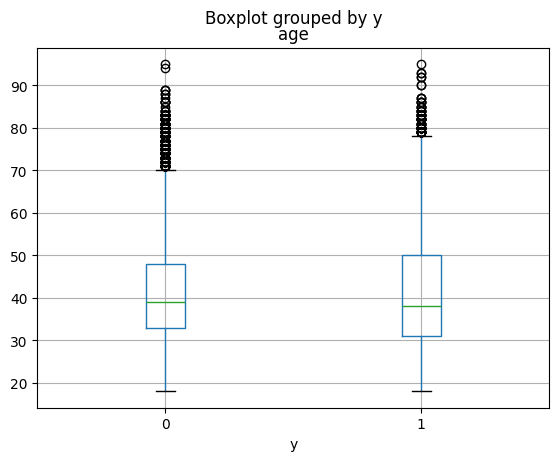

In [33]:
# Plotting Box Plot of Age by Status: >70 are all outliers and <50 and inline data
df_bank_new.boxplot(column=['age'], return_type='axes', by='y')
plt.show()

In [34]:
# We can do some further EDA for a pool of features as well
subset_attributes = ['age', 'balance', 'campaign', 'duration','pdays','previous']
err_yes = round(df_bank_new[df_bank_new['y'] == 1][subset_attributes].describe(),2)
err_no = round(df_bank_new[df_bank_new['y'] == 0][subset_attributes].describe(),2)
pd.concat([err_yes, err_no], axis=1, keys=['y=1 ', 'y=0'])

y=1                                                      y=0                                                   
           age   balance campaign duration    pdays previous       age    balance  campaign  duration     pdays  previous
count  5289.00   5289.00  5289.00  5289.00  5289.00  5289.00  39922.00   39922.00  39922.00  39922.00  39922.00  39922.00
mean     41.67   1804.27     2.14   537.29    68.70     1.17     40.84    1303.71      2.85    221.18     36.42      0.50
std      13.50   3501.10     1.92   392.53   118.82     2.55     10.17    2974.20      3.21    207.38     96.76      2.26
min      18.00  -3058.00     1.00     8.00    -1.00     0.00     18.00   -8019.00      1.00      0.00     -1.00      0.00
25%      31.00    210.00     1.00   244.00    -1.00     0.00     33.00      58.00      1.00     95.00     -1.00      0.00
50%      38.00    733.00     2.00   426.00    -1.00     0.00     39.00     417.00      2.00    164.00     -1.00      0.00
75%      50.00   2159.00     3.00   725.00    98.00     1.00     48.00    1345.00      3.00    279.00     -1.00      0.00
max      95.00  81204.00    32.00  3881.00   854.00    58.00     95.00  102127.00     63.00   4918.00    871.00    275.00

In [35]:
# Inferential Stats: compare mean of 2 or more independent variable groups
from scipy import stats
F, p = stats.f_oneway(df_bank_new[df_bank_new['y'] == 1]['balance'],
                      df_bank_new[df_bank_new['y'] == 0]['balance'])
print('ANOVA test for mean balance levels across y status')
print('F Statistic:', F, ' p-value:', p)

ANOVA test for mean balance levels across y status
F Statistic: 126.57227551143087  p-value: 2.5211136918594683e-29


In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

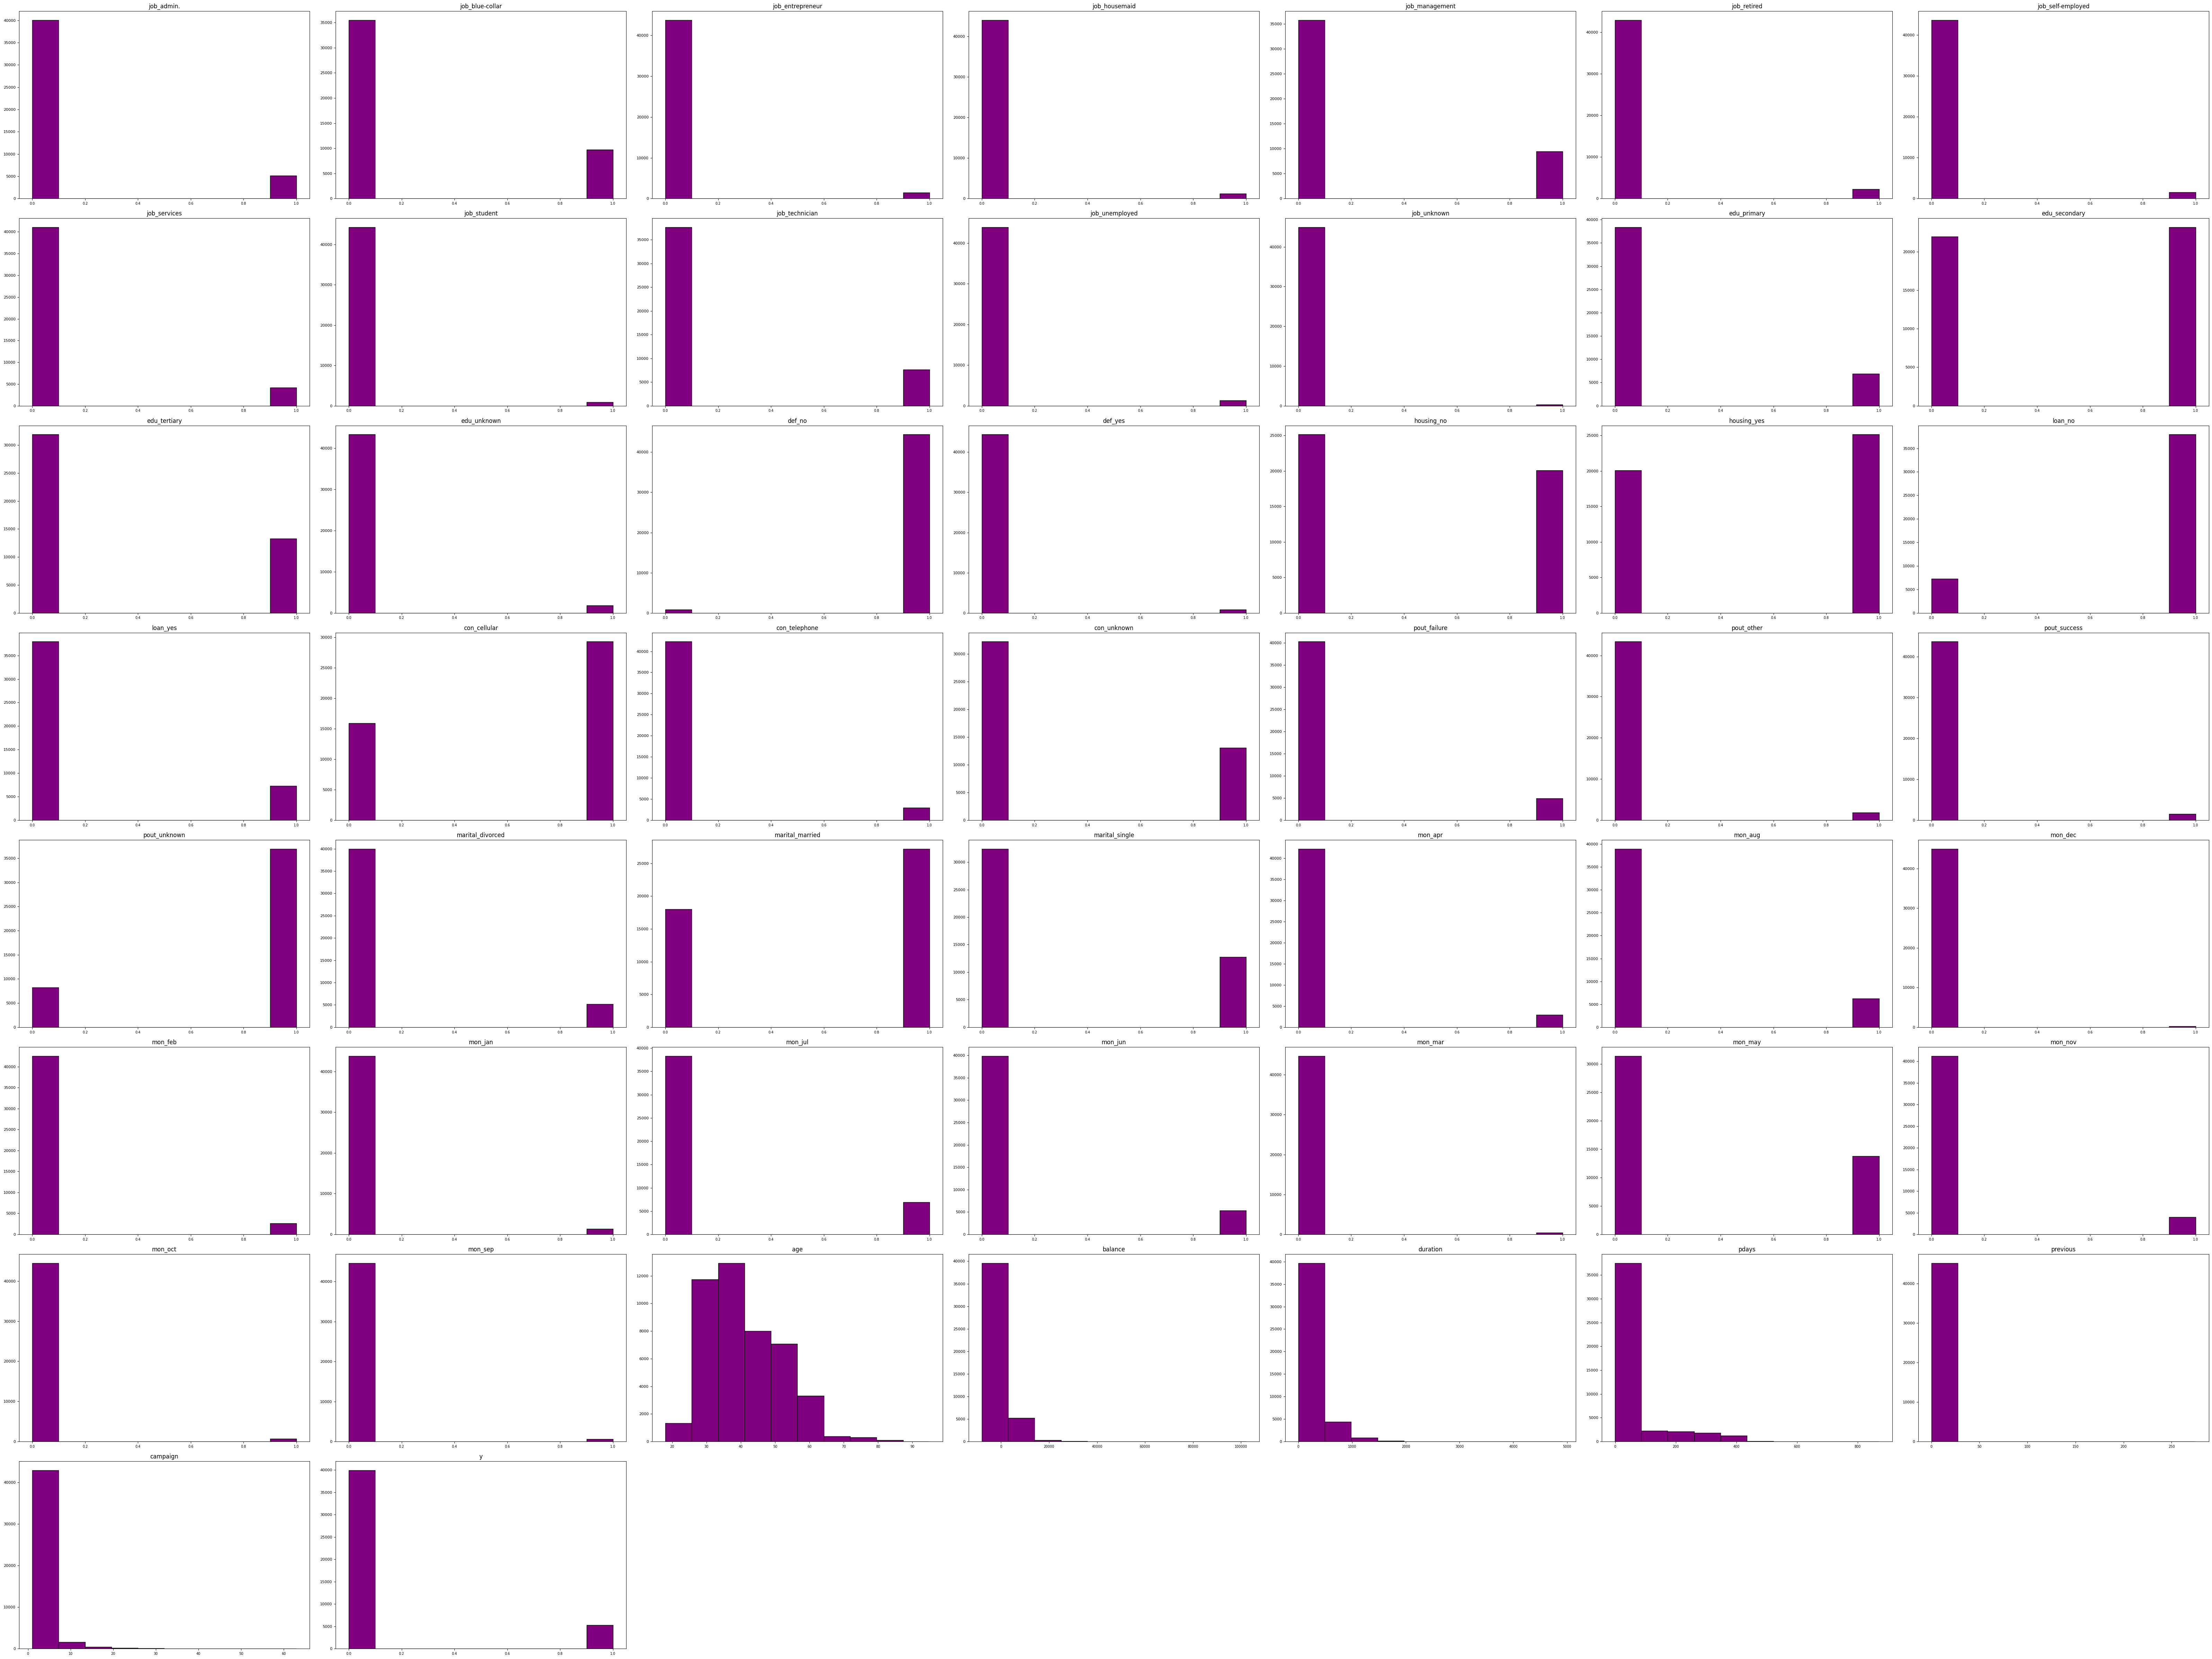

<Figure size 640x480 with 0 Axes>

In [37]:
# Univariate analysis:  Univariate analysis involves examining a single variable
# in a dataset to understand its distribution, central tendency, dispersion, and
# outliers. The provided code snippet uses histograms to perform this analysis.

df_bank_new.hist(bins=10, color='purple', edgecolor='black', linewidth=1.0,
              xlabelsize=7, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 10, 10))
plt.show()
# plt.tight_layout()
rt = plt.suptitle('Bank data', x=0.9, y=2.25, fontsize=20)

In [38]:
# Finding the Correlation values for all the features
# Calculates the correlation matrix for all numeric columns in df_bank_new.
#  1: Perfect positive correlation.−always its 1 when the column name is same in row and column
# −1: Perfect negative correlation.
#  0: No correlation.
#  Rounds the correlation coefficients to two decimal places for better readability.

(round(df_bank_new.corr(),2))

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,mon_nov,mon_oct,mon_sep,age,balance,duration,pdays,previous,campaign,y
job_admin.,1.00,-0.19,-0.07,-0.06,-0.18,-0.08,-0.07,-0.11,-0.05,-0.16,...,-0.01,0.01,0.01,-0.06,-0.03,-0.02,0.03,0.01,-0.02,0.01
job_blue-collar,-0.19,1.00,-0.10,-0.09,-0.27,-0.12,-0.10,-0.17,-0.08,-0.24,...,-0.05,-0.04,-0.04,-0.04,-0.05,0.01,0.02,-0.02,0.01,-0.07
job_entrepreneur,-0.07,-0.10,1.00,-0.03,-0.09,-0.04,-0.04,-0.06,-0.03,-0.08,...,0.05,-0.01,-0.01,0.02,0.01,-0.00,-0.01,-0.01,0.00,-0.02
job_housemaid,-0.06,-0.09,-0.03,1.00,-0.09,-0.04,-0.03,-0.05,-0.02,-0.08,...,-0.01,0.01,-0.00,0.09,0.00,-0.01,-0.03,-0.02,0.00,-0.02
job_management,-0.18,-0.27,-0.09,-0.09,1.00,-0.12,-0.10,-0.16,-0.07,-0.23,...,0.05,0.01,0.02,-0.02,0.07,-0.01,-0.01,0.02,0.02,0.03
job_retired,-0.08,-0.12,-0.04,-0.04,-0.12,1.00,-0.04,-0.07,-0.03,-0.10,...,-0.02,0.08,0.06,0.45,0.05,0.03,-0.01,0.01,-0.03,0.08
job_self-employed,-0.07,-0.10,-0.04,-0.03,-0.10,-0.04,1.00,-0.06,-0.03,-0.09,...,0.04,0.00,-0.01,-0.01,0.02,0.01,-0.01,-0.00,0.01,0.00
job_services,-0.11,-0.17,-0.06,-0.05,-0.16,-0.07,-0.06,1.00,-0.05,-0.14,...,-0.02,-0.03,-0.02,-0.07,-0.04,0.00,0.01,-0.01,-0.00,-0.03
job_student,-0.05,-0.08,-0.03,-0.02,-0.07,-0.03,-0.03,-0.05,1.00,-0.07,...,-0.02,0.03,0.05,-0.20,0.00,-0.01,0.02,0.02,-0.02,0.08
job_technician,-0.16,-0.24,-0.08,-0.08,-0.23,-0.10,-0.09,-0.14,-0.07,1.00,...,-0.01,-0.01,-0.02,-0.07,-0.02,-0.01,-0.01,-0.00,0.02,-0.01


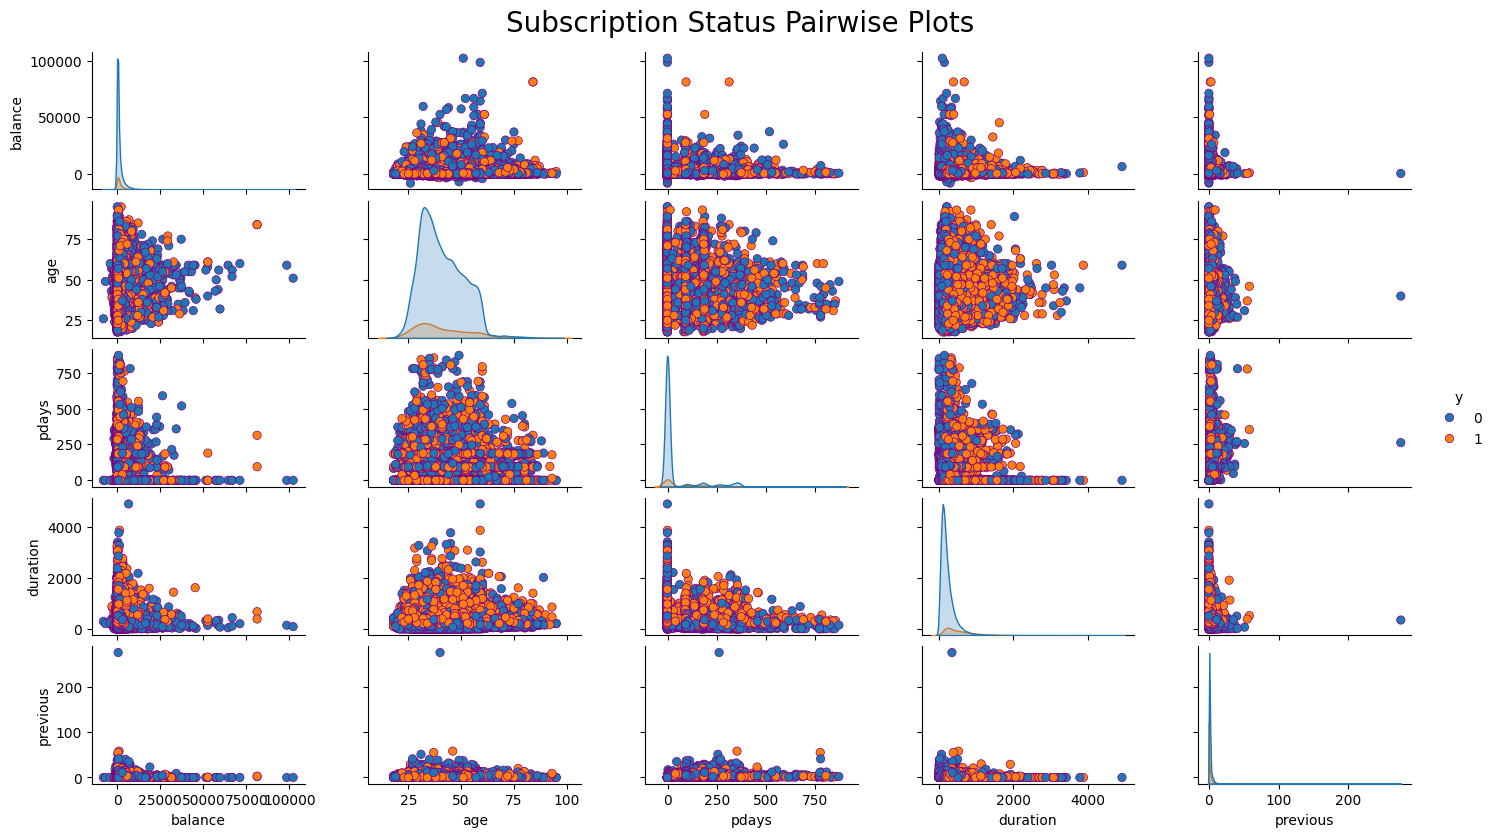

In [39]:
# create pairwise scatterplots and histograms for a subset of columns in the
# DataFrame df_bank_new, categorized by the y variable.

import seaborn as sns
cols = ['y','balance','age', 'pdays', 'duration','previous']
pp = sns.pairplot(df_bank_new[cols], hue='y', height=1.7, aspect=1.7,
                  plot_kws=dict(edgecolor="purple", linewidth=0.5))
fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Subscription Status Pairwise Plots', fontsize=20)

# Building the Logistic Regression Classifier for the Bank data

Feature Selection - Recursive Feature elimination

In [40]:
y_bank_data = df_bank_new['y']
X_bank_data = df_bank_new.drop(['y'],axis=1)

In [41]:
print(y_bank_data.shape)
print(X_bank_data.shape)

(45211,)
(45211, 50)


In [42]:
# Creating the Feature Space for Iris data
X_colnames_u = [cols for cols in df_bank_new.columns.tolist() if cols not in [
'y']]
X_colnames_u

['job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'edu_primary',
 'edu_secondary',
 'edu_tertiary',
 'edu_unknown',
 'def_no',
 'def_yes',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'con_cellular',
 'con_telephone',
 'con_unknown',
 'pout_failure',
 'pout_other',
 'pout_success',
 'pout_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'mon_apr',
 'mon_aug',
 'mon_dec',
 'mon_feb',
 'mon_jan',
 'mon_jul',
 'mon_jun',
 'mon_mar',
 'mon_may',
 'mon_nov',
 'mon_oct',
 'mon_sep',
 'age',
 'balance',
 'duration',
 'pdays',
 'previous',
 'campaign']

In [43]:
# Scaling of Data
from sklearn.preprocessing import MinMaxScaler
SC = MinMaxScaler()
X = pd.DataFrame(SC.fit_transform(X_bank_data), columns = X_colnames_u)

In [ ]:
X.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,mon_may,mon_nov,mon_oct,mon_sep,age,balance,duration,pdays,previous,campaign
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.52,0.09,0.05,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.34,0.07,0.03,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.19,0.07,0.02,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.38,0.09,0.02,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.19,0.07,0.04,0.0,0.0,0.0


In [44]:
# Creating Training and Test data
x_train,x_test,y_train,y_test = train_test_split(X,y_bank_data,train_size = 0.7,random_state=3)

In [45]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(31647, 50)
(13564, 50)
(31647,)
(13564,)


In [46]:
# Function for logging
import warnings
warnings.filterwarnings("ignore")

import time
from datetime import datetime
def log_msg(message):
    print(str(datetime.now()) + ": " + message)

In [47]:
log_msg("Started running LR for feature selection...")
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import RFE

lr1 = LogisticRegression(penalty='l2', tol=0.0001, C=0.003, fit_intercept=True, max_iter=200, verbose=1)
rfe = RFE(estimator=lr1, n_features_to_select=30, step=1)
rfe.fit(x_train, y_train)

log_msg("Completed running LR for feature selection...")

2024-12-03 10:44:56.740532: Started running LR for feature selection...
2024-12-03 10:44:59.178114: Completed running LR for feature selection...


In [48]:
select_features_rfe = rfe.get_support()
feature_names_rfe = X.columns[select_features_rfe]
print(feature_names_rfe)
set(feature_names_rfe)

Index(['job_blue-collar', 'job_retired', 'job_services', 'job_student', 'edu_tertiary', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'con_cellular', 'con_unknown', 'pout_failure',
       'pout_success', 'pout_unknown', 'marital_married', 'marital_single', 'mon_apr', 'mon_aug', 'mon_dec', 'mon_jan', 'mon_jul', 'mon_jun', 'mon_mar', 'mon_may', 'mon_nov', 'mon_oct', 'mon_sep',
       'duration', 'pdays', 'campaign'],
      dtype='object')


{'campaign',
 'con_cellular',
 'con_unknown',
 'duration',
 'edu_tertiary',
 'housing_no',
 'housing_yes',
 'job_blue-collar',
 'job_retired',
 'job_services',
 'job_student',
 'loan_no',
 'loan_yes',
 'marital_married',
 'marital_single',
 'mon_apr',
 'mon_aug',
 'mon_dec',
 'mon_jan',
 'mon_jul',
 'mon_jun',
 'mon_mar',
 'mon_may',
 'mon_nov',
 'mon_oct',
 'mon_sep',
 'pdays',
 'pout_failure',
 'pout_success',
 'pout_unknown'}

In [49]:
# Final Features
cols=['age',
 'balance',
 'campaign',
 'con_unknown',
 'duration',
 'edu_primary',
 'edu_secondary',
 'edu_tertiary',
 'housing_no',
 'housing_yes',
 'job_blue-collar',
 'job_management',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'loan_no',
 'loan_yes',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'mon_aug',
 'mon_jul',
 'mon_may',
 'mon_nov',
 'mon_sep',
 'pdays',
 'pout_failure',
 'pout_success',
 'previous']
x_new_f=df_bank_new[cols]
y_new_f=df_bank_new['y']

In [50]:
print(x_new_f.shape)
print(y_new_f.shape)

(45211, 30)
(45211,)


In [51]:
x_new_f.head(2)

,age,balance,campaign,con_unknown,duration,edu_primary,edu_secondary,edu_tertiary,housing_no,housing_yes,...,marital_single,mon_aug,mon_jul,mon_may,mon_nov,mon_sep,pdays,pout_failure,pout_success,previous
0,58,2143,1,1,261,0,0,1,0,1,...,0,0,0,1,0,0,-1,0,0,0
1,44,29,1,1,151,0,1,0,0,1,...,1,0,0,1,0,0,-1,0,0,0


In [52]:
# Create the train data with final list of features
# Creating Training and Test data
x_train,x_test,y_train,y_test = train_test_split(x_new_f,y_new_f,train_size = 0.7,random_state=4)
# x_train_sc,x_test_sc,y_train_sc,y_test_sc = train_test_split(X,y_new_f,train_size = 0.7,random_state=4)

In [53]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(31647, 30)
(13564, 30)
(31647,)
(13564,)


In [54]:
# Fit a logistic regression Model using statsmodels package
import statsmodels.api as sm
logit_model=sm.Logit(y_train,sm.add_constant(x_train))
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.246226
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31619
Method:                           MLE   Df Model:                           27
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                  0.3260
Time:                        10:52:45   Log-Likelihood:                -7792.3
converged:                       True   LL-Null:                       -11561.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2666        nan        nan        nan         nan         nan
age     

In [55]:
#assigning the Logistic regressor
# LogisticRegression is a classification algorithm that predicts the probability
# of a binary or multi-class outcome based on input features.
# By default, it uses the sigmoid function to model the probability of the target class
Lr_1=LogisticRegression()

# Model training by fitting the train data
# This trains the logistic regression model using the training data.
Lr_1.fit(x_train,y_train)

LogisticRegression()

In [56]:
# Predicting the results on the train and test data
y_predict_train=Lr_1.predict(x_train)
y_predict_test=Lr_1.predict(x_test)

Evaluation Matrix

In [57]:
from  sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report

In [ ]:
# Printing the confusion matrix
print("y_train   y_predict_train")
print(confusion_matrix(y_train,y_predict_train))
print()
print("y_test    y_predict_test")
print(confusion_matrix(y_test,y_predict_test))

y_train   y_predict_train
[[27248   627]
 [ 2851   921]]

y_test    y_predict_test
[[11756   291]
 [ 1164   353]]


Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

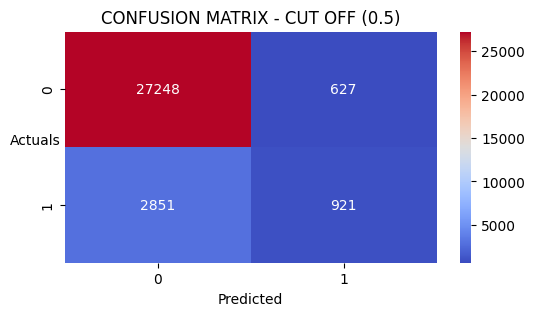

In [58]:
# Plotting the confusion matrix on train data
plt.figure(figsize=(6, 3))  # Adjust width and height

sns.heatmap((confusion_matrix(y_train,y_predict_train)),annot=True,fmt='.5g'
            ,cmap='coolwarm');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

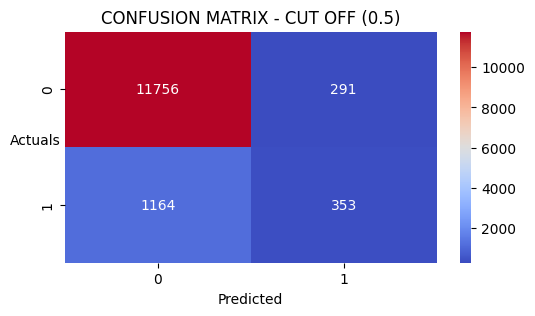

In [59]:
# Confusion matrix on the test data
plt.figure(figsize=(6, 3))  # Adjust width and height
sns.heatmap((confusion_matrix(y_test,y_predict_test)),annot=True,fmt='.5g'
            ,cmap='coolwarm');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [60]:
# Accuracy score of the train and test data
acc_train=  accuracy_score(y_train,y_predict_train)
acc_test= accuracy_score(y_test,y_predict_test)
print("train_accuracy",acc_train)

print("test_accuracy",acc_test)

train_accuracy 0.8901001674724303
test_accuracy 0.8927307578885284


In [61]:
#Recall score of the train and test data
recall_train=recall_score(y_train,y_predict_train)
recall_test=recall_score(y_test,y_predict_test)
print("train_recall",recall_train)

print("test_recall",recall_test)

train_recall 0.2441675503711559
test_recall 0.23269611074489124


In [62]:
# Precision Score of the train and test data
prec_train=precision_score(y_train,y_predict_train)
prec_test=precision_score(y_test,y_predict_test)
print("train_prec",prec_train)

print("test_prec",prec_test)

train_prec 0.5949612403100775
test_prec 0.5481366459627329


In [63]:
# F1 score of the train and test data
f1_train=f1_score(y_train,y_predict_train)
f1_test=f1_score(y_test,y_predict_test)
print("f1_train",f1_train)
print("f1_test",f1_test)

f1_train 0.3462406015037594
f1_test 0.3267006015733457


In [64]:
# Printing the metrics on train data
print(classification_report(y_train,y_predict_train))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     27875
           1       0.59      0.24      0.35      3772

    accuracy                           0.89     31647
   macro avg       0.75      0.61      0.64     31647
weighted avg       0.87      0.89      0.87     31647



In [65]:
# Printing the metrics on the test data
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12047
           1       0.55      0.23      0.33      1517

    accuracy                           0.89     13564
   macro avg       0.73      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     13564



# Assignment 04



In [66]:
# Traditional Credit Scoring Using Logistic Regression
import scorecardpy as sc

In [67]:
iv = sc.iv(df_bank_new,y="y")

In [68]:
iv.head(20)

,variable,info_value
29,duration,1.67
26,balance,0.90
10,pdays,0.55
38,pout_success,0.48
16,con_unknown,0.30
3,previous,0.23
34,age,0.23
45,pout_unknown,0.22
42,con_cellular,0.21
46,housing_no,0.19


In [69]:
# filter variable via missing rate, iv, identical value rate
dt_s = sc.var_filter(df_bank_new, y="y")

[INFO] filtering variables ...
Variable filtering on 45211 rows and 51 columns in 00:00:10 
30 variables are removed


In [70]:
dt_s.dtypes

,0
job_blue-collar,int64
edu_tertiary,int64
mon_apr,int64
previous,int64
loan_yes,int64
marital_married,int64
pdays,int64
con_unknown,int64
housing_yes,int64
balance,int64


In [71]:
# breaking dt into train and test
train, test = sc.split_df(dt_s, 'y').values()

[INFO] creating woe binning ...
Binning on 45211 rows and 21 columns in 00:00:10


{'job_blue-collar': <Figure size 640x480 with 2 Axes>,
 'previous': <Figure size 640x480 with 2 Axes>,
 'mon_apr': <Figure size 640x480 with 2 Axes>,
 'edu_tertiary': <Figure size 640x480 with 2 Axes>,
 'housing_yes': <Figure size 640x480 with 2 Axes>,
 'balance': <Figure size 640x480 with 2 Axes>,
 'campaign': <Figure size 640x480 with 2 Axes>,
 'duration': <Figure size 640x480 with 2 Axes>,
 'loan_yes': <Figure size 640x480 with 2 Axes>,
 'marital_married': <Figure size 640x480 with 2 Axes>,
 'age': <Figure size 640x480 with 2 Axes>,
 'pdays': <Figure size 640x480 with 2 Axes>,
 'marital_single': <Figure size 640x480 with 2 Axes>,
 'mon_may': <Figure size 640x480 with 2 Axes>,
 'loan_no': <Figure size 640x480 with 2 Axes>,
 'con_unknown': <Figure size 640x480 with 2 Axes>,
 'job_retired': <Figure size 640x480 with 2 Axes>,
 'con_cellular': <Figure size 640x480 with 2 Axes>,
 'pout_unknown': <Figure size 640x480 with 2 Axes>,
 'housing_no': <Figure size 640x480 with 2 Axes>}

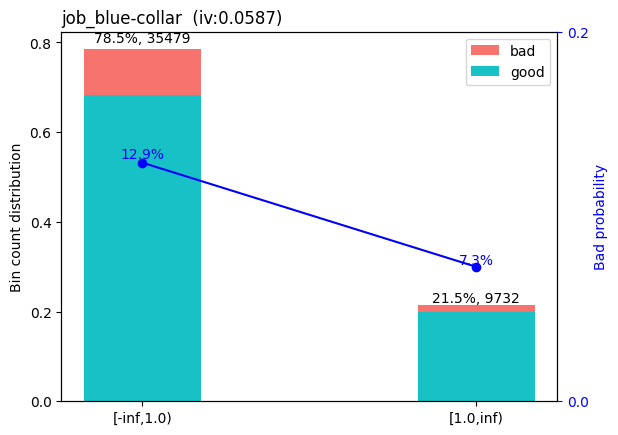

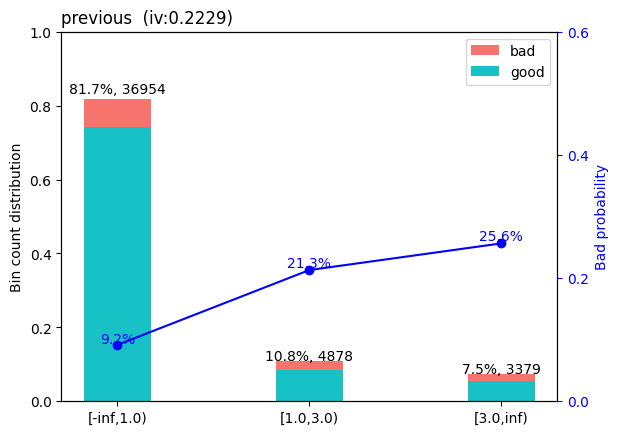

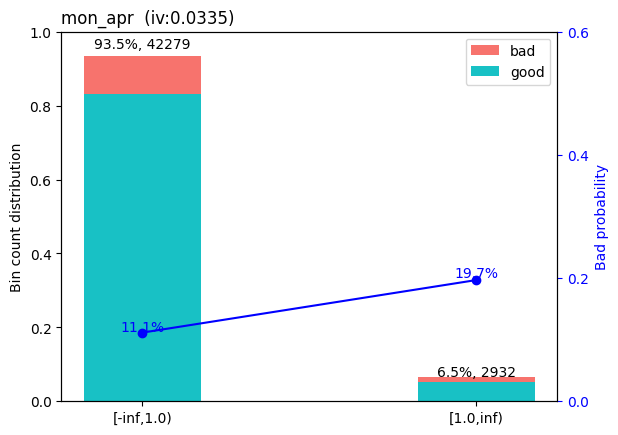

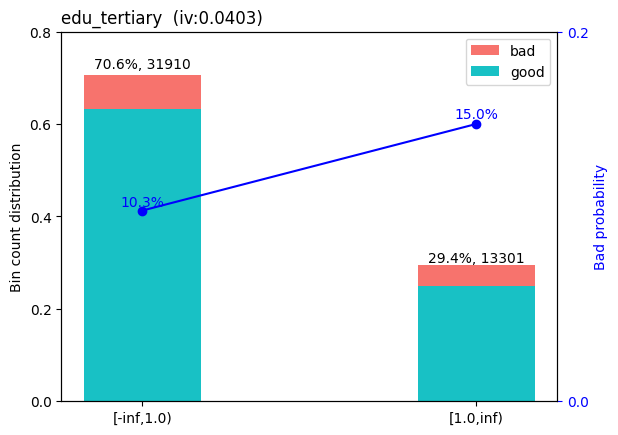

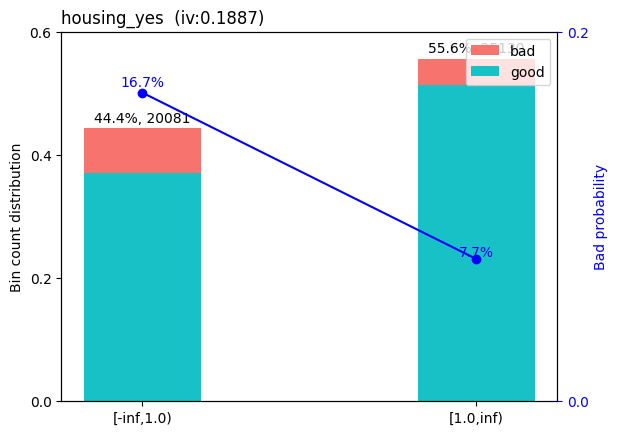

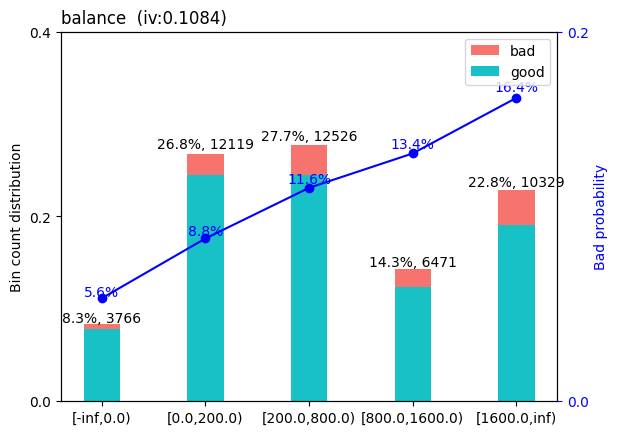

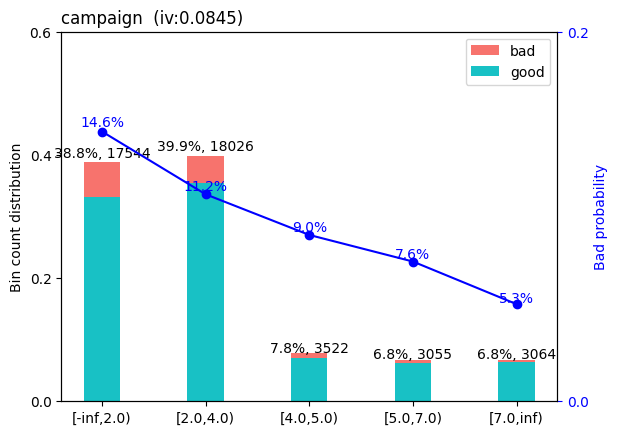

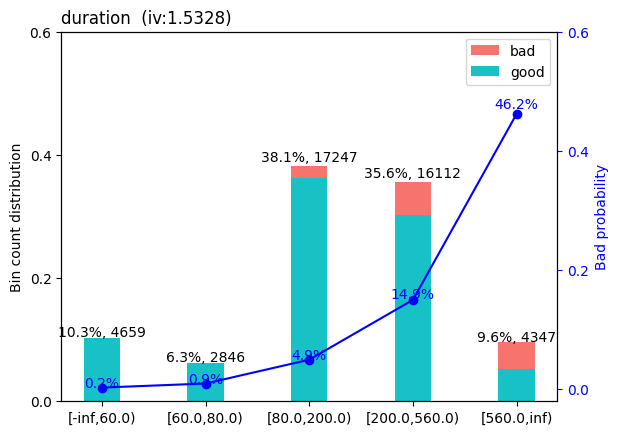

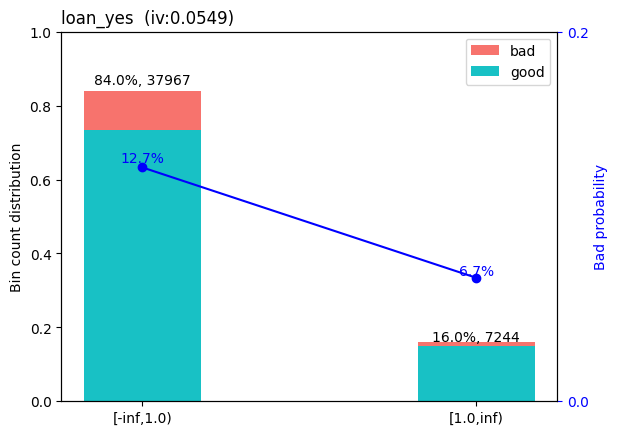

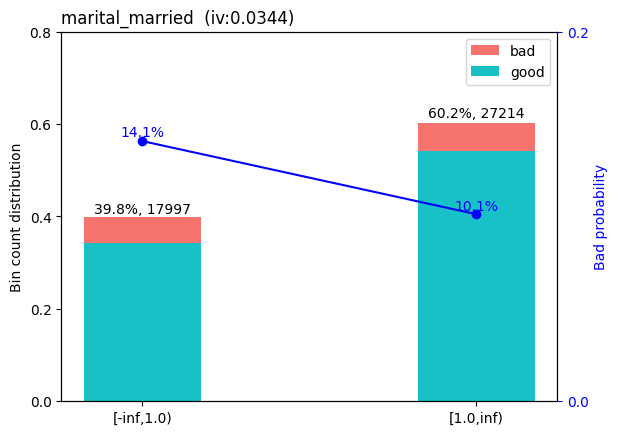

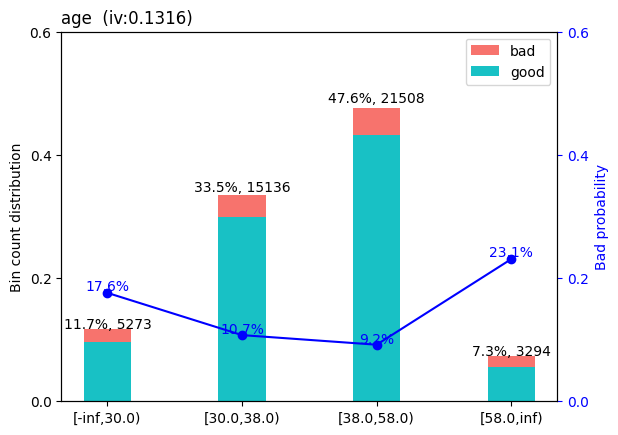

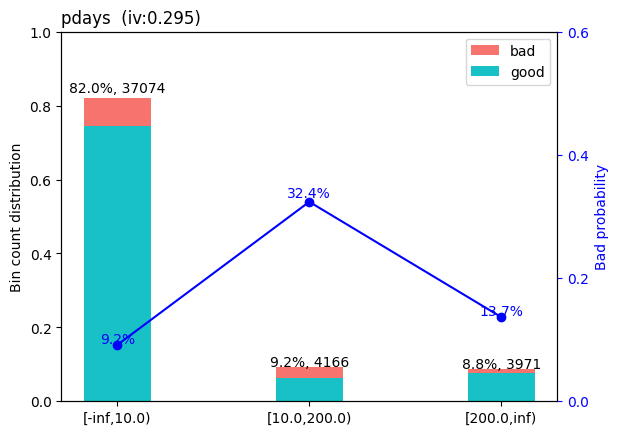

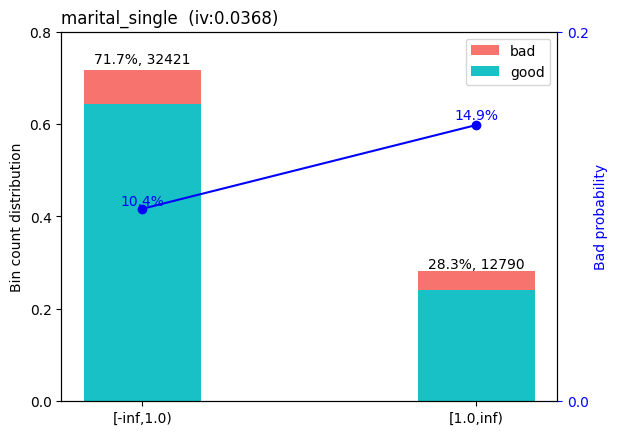

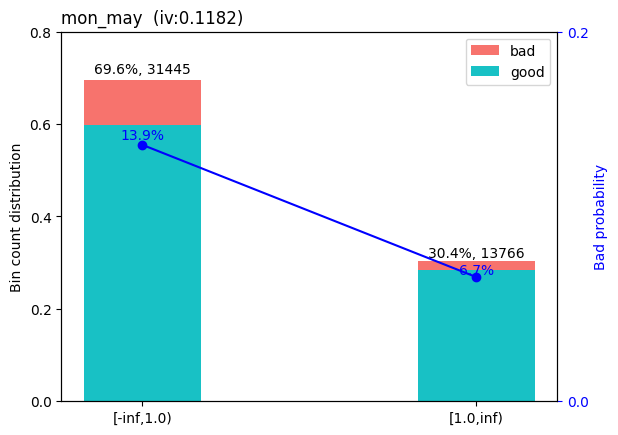

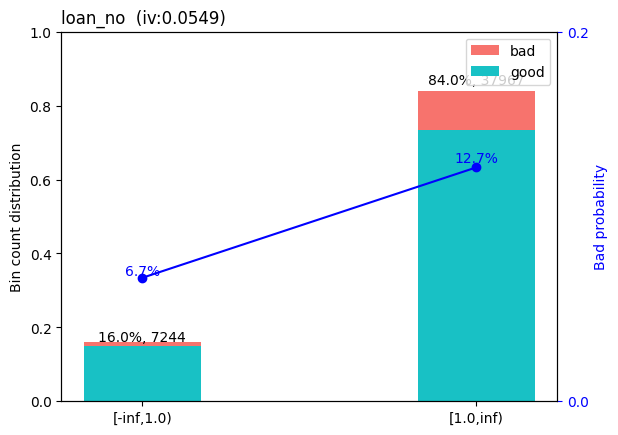

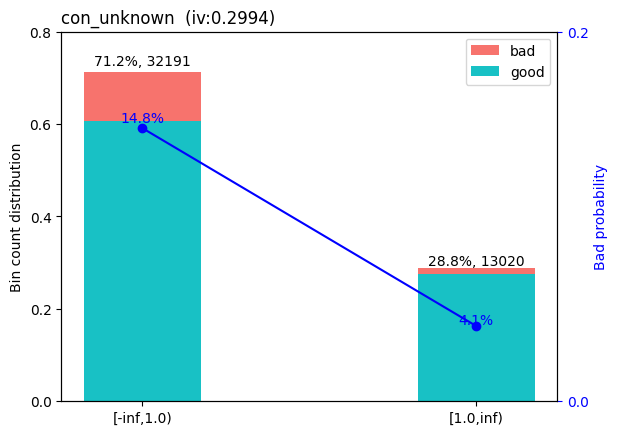

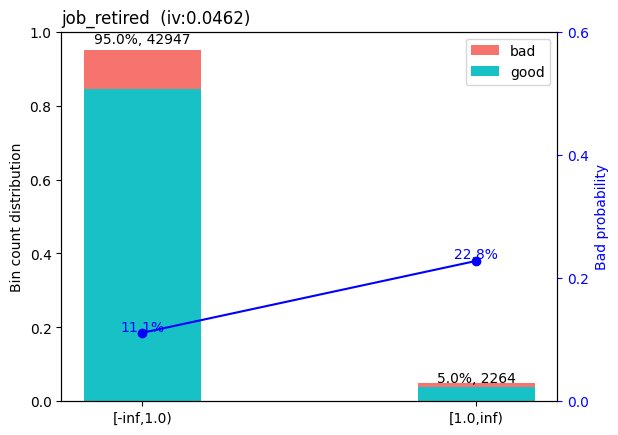

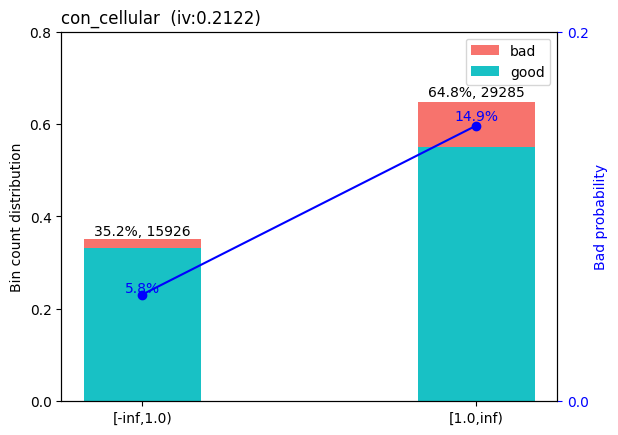

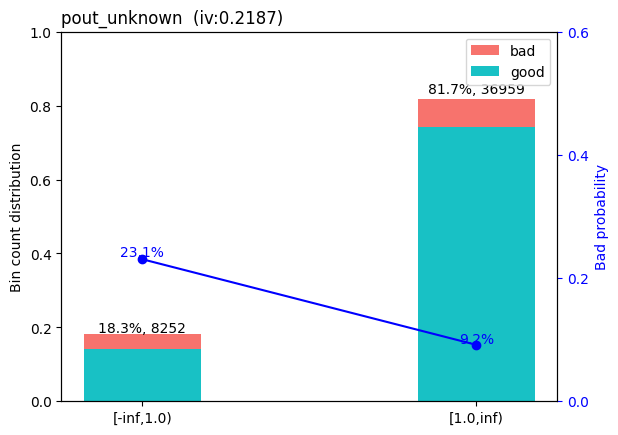

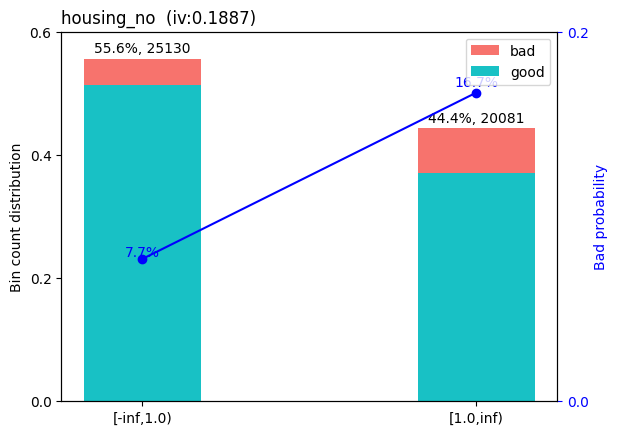

In [72]:
# woe binning ------
bins = sc.woebin(dt_s, y="y")
sc.woebin_plot(bins)

In [73]:
# binning adjustment
# # adjust breaks interactively
# breaks_adj = sc.woebin_adj(dt_s, "creditability", bins)
# # or specify breaks manually
breaks_adj = {
'age.in.years': [30, 35, 40],}
bins_adj = sc.woebin(dt_s, y="y", breaks_list=breaks_adj)

[INFO] creating woe binning ...
Binning on 45211 rows and 21 columns in 00:00:11


In [74]:
# converting train and test into woe values
train_woe = sc.woebin_ply(train, bins_adj)
test_woe = sc.woebin_ply(test, bins_adj)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [75]:
train_woe.head()

,y,job_blue-collar_woe,previous_woe,mon_apr_woe,edu_tertiary_woe,loan_yes_woe,marital_married_woe,pdays_woe,con_unknown_woe,housing_yes_woe,...,campaign_woe,duration_woe,age_woe,marital_single_woe,mon_may_woe,loan_no_woe,job_retired_woe,con_cellular_woe,pout_unknown_woe,housing_no_woe
0,0,0.11,-0.27,-0.05,0.29,0.09,-0.16,-0.27,-1.14,-0.46,...,0.25,0.28,0.82,-0.13,-0.61,0.09,-0.06,-0.77,-0.27,-0.46
2,0,0.11,-0.27,-0.05,-0.14,-0.62,-0.16,-0.27,-1.14,-0.46,...,0.25,-2.70,-0.10,-0.13,-0.61,-0.62,-0.06,-0.77,-0.27,-0.46
4,0,0.11,-0.27,-0.05,-0.14,0.09,0.21,-0.27,-1.14,0.41,...,0.25,-0.95,-0.10,0.28,-0.61,0.09,-0.06,-0.77,-0.27,0.41
5,0,0.11,-0.27,-0.05,0.29,0.09,-0.16,-0.27,-1.14,-0.46,...,0.25,-0.95,-0.10,-0.13,-0.61,0.09,-0.06,-0.77,-0.27,-0.46
6,0,0.11,-0.27,-0.05,0.29,-0.62,0.21,-0.27,-1.14,-0.46,...,0.25,0.28,0.48,0.28,-0.61,-0.62,-0.06,-0.77,-0.27,-0.46


In [76]:
test_woe.head()

,y,job_blue-collar_woe,previous_woe,mon_apr_woe,edu_tertiary_woe,loan_yes_woe,marital_married_woe,pdays_woe,con_unknown_woe,housing_yes_woe,...,campaign_woe,duration_woe,age_woe,marital_single_woe,mon_may_woe,loan_no_woe,job_retired_woe,con_cellular_woe,pout_unknown_woe,housing_no_woe
1,0,0.11,-0.27,-0.05,-0.14,0.09,0.21,-0.27,-1.14,-0.46,...,0.25,-0.95,-0.27,0.28,-0.61,0.09,-0.06,-0.77,-0.27,-0.46
3,0,-0.52,-0.27,-0.05,-0.14,0.09,-0.16,-0.27,-1.14,-0.46,...,0.25,-0.95,-0.27,-0.13,-0.61,0.09,-0.06,-0.77,-0.27,-0.46
10,0,0.11,-0.27,-0.05,-0.14,0.09,0.21,-0.27,-1.14,-0.46,...,0.25,0.28,-0.27,-0.13,-0.61,0.09,-0.06,-0.77,-0.27,-0.46
17,0,-0.52,-0.27,-0.05,-0.14,0.09,-0.16,-0.27,-1.14,-0.46,...,0.25,-4.23,-0.27,-0.13,-0.61,0.09,-0.06,-0.77,-0.27,-0.46
24,0,0.11,-0.27,-0.05,-0.14,-0.62,-0.16,-0.27,-1.14,-0.46,...,0.25,-0.95,-0.27,-0.13,-0.61,-0.62,0.80,-0.77,-0.27,-0.46


In [77]:
y_train = train_woe.loc[:,'y']
X_train = train_woe.loc[:,train_woe.columns != 'y']
y_test = test_woe.loc[:,'y']
X_test = test_woe.loc[:,train_woe.columns != 'y']

In [78]:
# logistic regression ------
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[[ 0.37307328  0.65074106  0.4475783   0.5898727   0.38089032  0.42893892
   0.66749459  0.4782725   0.45721102  0.5145343   0.70408799  1.15046581
   0.68336019  0.38370491  0.23860362  0.38089032  0.04342115  0.17643804
  -0.3700329   0.45721102]]
[-2.08985303]


In [79]:
# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

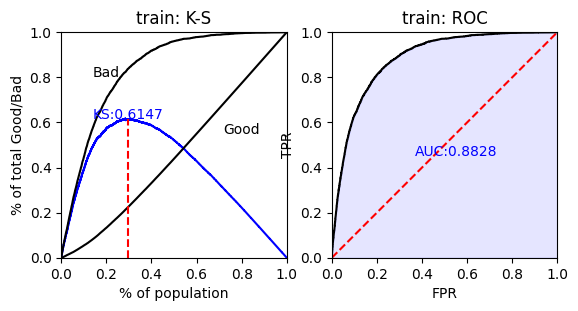

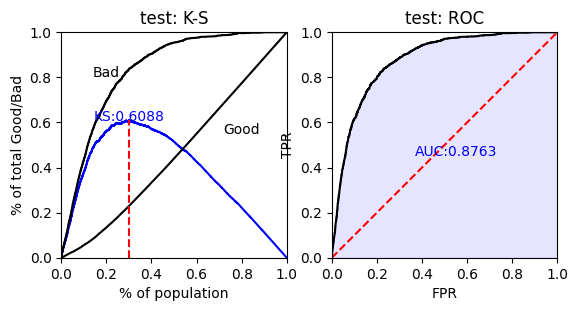

In [80]:
# performance ks & roc ------
train_perf = sc.perf_eva(y_train, train_pred, title = "train")
test_perf = sc.perf_eva(y_test, test_pred, title = "test")

In [81]:
train_perf

{'KS': 0.6147,
 'AUC': 0.8828,
 'Gini': 0.7655,
 'pic': <Figure size 640x480 with 2 Axes>}

In [82]:
test_perf

{'KS': 0.6088,
 'AUC': 0.8763,
 'Gini': 0.7527,
 'pic': <Figure size 640x480 with 2 Axes>}

In [83]:
# score ------
card = sc.scorecard(bins_adj, lr, X_train.columns)
# credit score
train_score = sc.scorecard_ply(train, card, print_step=0)
test_score = sc.scorecard_ply(test, card, print_step=0)

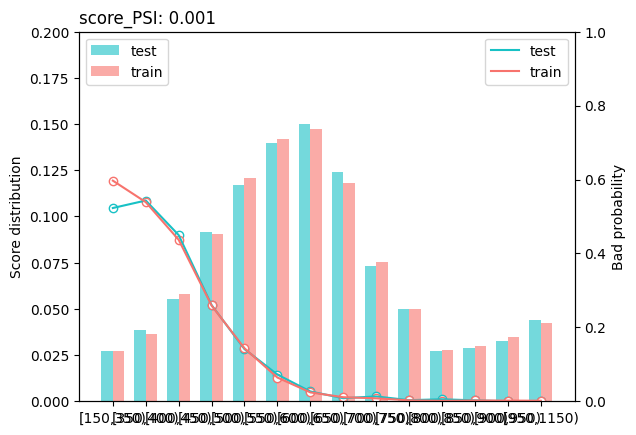

{'psi':   variable       PSI
 0    score  1.00e-03,
 'pic': {'score': <Figure size 640x480 with 2 Axes>}}

In [84]:
# psi
sc.perf_psi(
score = {'train':train_score, 'test':test_score},
label = {'train':y_train, 'test':y_test}
)